<a href="https://colab.research.google.com/github/jjayli/my-data-science/blob/main/notebooks/waseda_admission_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2019년부터 2025년까지의 **어학원 학기별 합격자 수 / 지원자 수** 데이터를 기반으로  
합격률의 변화를 시각화 및 코로나19 시기의 영향을 함께 해석해 봄

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
import pandas as pd
import numpy as np

data = {
    "semester": [
        "2019-Spring", "2019-Fall",
        "2020-Spring", "2020-Fall",
        "2021-Spring", "2021-Fall",
        "2022-Spring", "2022-Fall",
        "2023-Spring", "2023-Fall",
        "2024-Spring",
        "2025-Spring", "2025-Fall"
    ],
    "applicants": [289, 348, 275, 199, 187, 151, 107, 218, 274, 378, 294, 312, 454],
    "admitted":   [223, 286, 246, 186, 168, 139, 93, 185, 224, 254, 193, 200, 249]
}

df = pd.DataFrame(data)


In [48]:
# 연도/학기 분리
df["year"] = df["semester"].str.slice(0, 4).astype(int)
df["season"] = df["semester"].str.slice(5)


In [49]:
missing_row = pd.DataFrame({
    "semester": ["2024-Fall"],
    "applicants": [np.nan],
    "admitted": [np.nan],
    "year": [2024],
    "season": ["Fall"]
})

df = pd.concat([df, missing_row], ignore_index=True)


In [50]:
df = df.sort_values(["year", "season"]).reset_index(drop=True)


In [51]:
print(df)

       semester  applicants  admitted  year  season
0     2019-Fall       348.0     286.0  2019    Fall
1   2019-Spring       289.0     223.0  2019  Spring
2     2020-Fall       199.0     186.0  2020    Fall
3   2020-Spring       275.0     246.0  2020  Spring
4     2021-Fall       151.0     139.0  2021    Fall
5   2021-Spring       187.0     168.0  2021  Spring
6     2022-Fall       218.0     185.0  2022    Fall
7   2022-Spring       107.0      93.0  2022  Spring
8     2023-Fall       378.0     254.0  2023    Fall
9   2023-Spring       274.0     224.0  2023  Spring
10    2024-Fall         NaN       NaN  2024    Fall
11  2024-Spring       294.0     193.0  2024  Spring
12    2025-Fall       454.0     249.0  2025    Fall
13  2025-Spring       312.0     200.0  2025  Spring


2024 가을 결측치

In [52]:
#  Linear Interpolation 으로 결측치 해결
df["applicants"] = df["applicants"].interpolate()
df["admitted"] = df["admitted"].interpolate()

# 합격률 컬럼 추가
df["rate"] = df["admitted"] / df["applicants"]
print(df)

       semester  applicants  admitted  year  season      rate
0     2019-Fall       348.0     286.0  2019    Fall  0.821839
1   2019-Spring       289.0     223.0  2019  Spring  0.771626
2     2020-Fall       199.0     186.0  2020    Fall  0.934673
3   2020-Spring       275.0     246.0  2020  Spring  0.894545
4     2021-Fall       151.0     139.0  2021    Fall  0.920530
5   2021-Spring       187.0     168.0  2021  Spring  0.898396
6     2022-Fall       218.0     185.0  2022    Fall  0.848624
7   2022-Spring       107.0      93.0  2022  Spring  0.869159
8     2023-Fall       378.0     254.0  2023    Fall  0.671958
9   2023-Spring       274.0     224.0  2023  Spring  0.817518
10    2024-Fall       284.0     208.5  2024    Fall  0.734155
11  2024-Spring       294.0     193.0  2024  Spring  0.656463
12    2025-Fall       454.0     249.0  2025    Fall  0.548458
13  2025-Spring       312.0     200.0  2025  Spring  0.641026


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

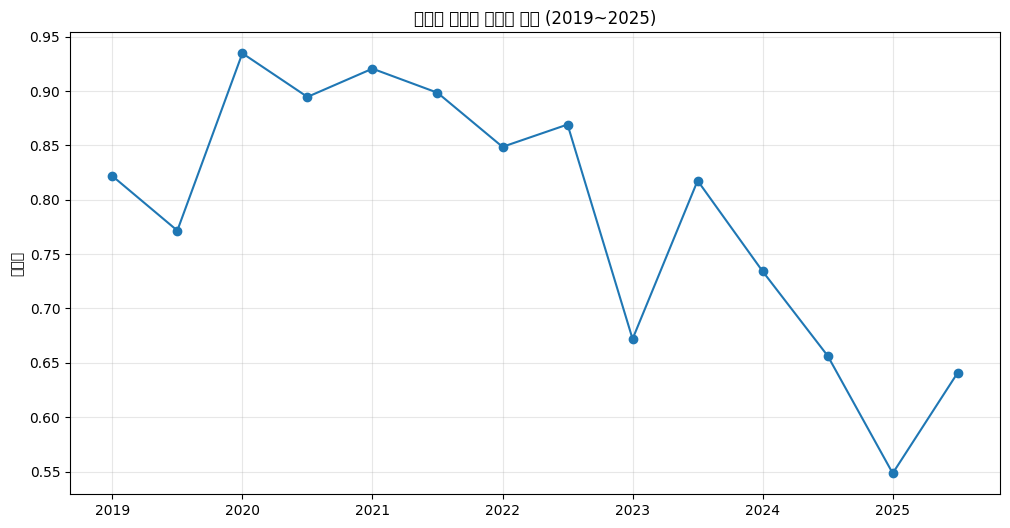

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["rate"], marker="o")

# 연도 변경 시점에만 라벨 표시
ticks = []
labels = []
prev_year = None
for idx, y in zip(df.index, df["year"]):
    if y != prev_year:
        ticks.append(idx)
        labels.append(str(y))
        prev_year = y

plt.xticks(ticks, labels)
plt.title("어학원 학기별 합격률 변화 (2019~2025)")
plt.ylabel("합격률")
plt.grid(True, alpha=0.3)

plt.show()


- **2019~2020년:**  
  코로나19 초기에 해당하는 시기로, 전 세계적으로 유학·어학연수 수요가 감소.  
  : 이 시기엔 상대적으로 공급보다 수요가 줄어 **합격률이 높게 유지**되는 경향 보임.

- **2021~2022년:**  
 **합격률이 다소 변동적**.  
  2021년은 코로나의 후반부로 지원자 수 자체가 안정되지 않은 시기.

- **2023~2025년:**  
  **지원자 수가 크게 증가**함에 따라 합격률이 60%대까지 하락.  